# Laboratorio 1: Algunos gráficos estadísticos básicos

En esta práctica realizaremos algunos gráficos estadísticos básicos en Python.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
[math](https://docs.python.org/2/library/math.html) proporciona múltiples funciones matemáticas.
 
A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [3]:
# Una configuración de visualización
#import visual_style
#visual_style.customize_mpl()
#visual_style.customize_css()

# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


plt.style.use('ggplot')
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

## 1. Diagramas de distribución para una variable unidimensional
Utilizaremos el método reader() de la librería csv o el método read_csv() de la librería pandas para leer el conjunto de datos con el que trabajaremos

### Ejemplo
Sea X una variable aleatoria que toma como valores la vida útil en horas de un conjunto de baterías de litio para un modelo específico de calculadora de bolsillo. Disponemos de una muestra aleatoria de 50 baterías y anotamos la vida útil de cada una de ellas. Los resultados están disponibles en el fichero baterias.csv.

In [4]:
import numpy as np
datasetName = 'baterias.csv'
datasetDelimiter = ','
# load the CSV file as a numpy matrix
dataset = np.loadtxt(datasetName, delimiter=datasetDelimiter)
print (dataset.shape)
dataset

(50L,)


array([ 4285.,  2066.,  2584.,  1009.,   318.,  1429.,   981.,  1402.,
        1137.,   414.,   564.,   604.,    14.,  4152.,   737.,   852.,
        1560.,  1786.,   520.,   396.,  1278.,   209.,   349.,   478.,
        3032.,  1461.,   701.,  1406.,   261.,    83.,   205.,   602.,
        3770.,   726.,  3894.,  2662.,   497.,    35.,  2778.,  1379.,
        3920.,  1379.,    99.,   510.,   582.,   308.,  3367.,    99.,
         373.,   454.])

## 2. Dibujamos el histograma
Usamos para ello la función plt.hist(). Probaremos distintas fórmulas de cálculo del número de categorías k, entre otras, la regla de Sturges, donde $k= \lceil log_2 n + 1\rceil$, donde n es el número de muestras.

Número de particiones en el histograma:  7


(array([ 23.,   7.,   9.,   1.,   4.,   1.,   5.]),
 array([   14.        ,   624.14285714,  1234.28571429,  1844.42857143,
         2454.57142857,  3064.71428571,  3674.85714286,  4285.        ]),
 <a list of 7 Patch objects>)

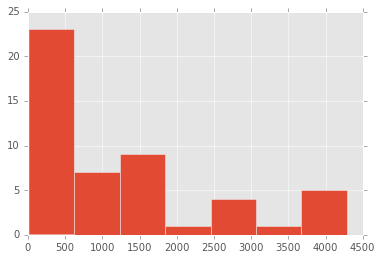

In [5]:
k = int(math.ceil(math.log(dataset.shape[0],2) + 1 ))
print "Número de particiones en el histograma: ", k
plt.hist(dataset, bins = k)

## 3. Dibujamos la distribución de frecuencias acumulada
También denominada ojiva de frecuencias relativas acumuladas. Se obtiene mediante la acumulación, en cada barra del histograma, de la evidencia obtenida hasta ese punto, y calcular su razón respecto al número total de datos. Dibujaremos además la línea punteada que une los extremos de las categorías y que permite disponer de una medida interpolada de la frecuencia relativa acumulada. Esto último podemos hacerlo mediante la función plt.plot().

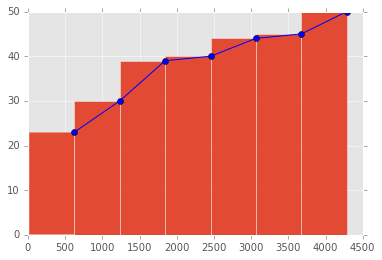

In [7]:
#range(0,k) plt.plot()
histA = plt.hist(dataset, bins = k, cumulative=True)
plt.plot(histA[1][1:histA[1].shape[0]],histA[0], 'bo-')


### Pregunta
¿Cuál es el porcentaje de baterías que fallará durante las primeras 1500 horas de operación? Generalizarlo a cualquier valor comprendido entre los datos de la muestra.

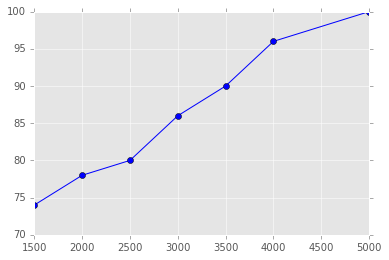

In [27]:
hrsOper = [1500,2000,2500,3000,3500,4000,5000]
porcentaje = [(dataset[ np.where( dataset < hr ) ].shape[0]) for hr in hrsOper]
porcentaje = pd.Series(porcentaje)
porcentaje = (porcentaje / dataset.shape[0])*100
plt.plot(hrsOper,porcentaje, 'bo-')
#porcentaje = (porcentaje[:] / dataset.shape[0]) * 100
#porcentaje
#keysBiggerThan = [key for key in keys_numeric if (int(key) >= 2015 and int(key) <= 2025)]
#porcentaje = (dataset[ np.where( dataset < 1500 ) ].shape[0] / dataset.shape[0]) * 100
#porcentaje

## 4. Dibujamos el diagrama de caja
Para ello utilizamos la función plt.boxplot().

{'boxes': [<matplotlib.lines.Line2D at 0xb5139e8>],
 'caps': [<matplotlib.lines.Line2D at 0xb522710>,
 'fliers': [<matplotlib.lines.Line2D at 0xbee87b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbee8240>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb513b70>,
  <matplotlib.lines.Line2D at 0xb522198>]}

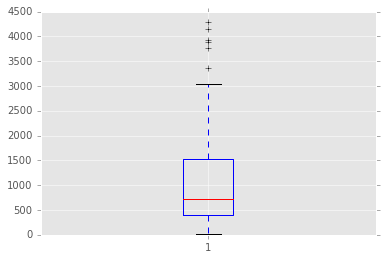

In [21]:
plt.boxplot(dataset)

## 5. Diagramas de distribución para variables multidimensionales
Utilizaremos un nuevo ejemplo.

### Ejemplo
Disponemos de una muestra de 150 lirios de tres clases distintas: virginica, setosa y versicolor, y de los que hemos medido sistemáticamente la longitud y anchura en centímetros de los sépalos, y longitud y anchura en centímetros de los pétalos.

In [29]:
dataSetName = "iris.csv"
iris = pd.read_csv(dataSetName,header=None,names=['LS','WS','LP','WP','CLASS'])
iris.head()

,LS,WS,LP,WP,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 6. Representamos los histogramas de los distintos tipos de lirios
Para cada tipo de lirio, representamos los histogramas de las cuatro características que se han medido.

In [44]:
n = iris.shape[0]
k = math.ceil(math.log(n,2) + 1 )


Iris-setosa
Iris-versicolor
Iris-virginica


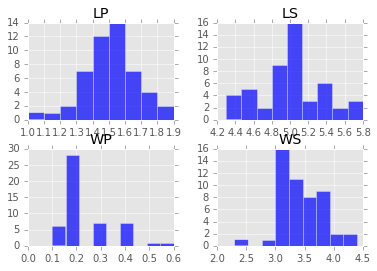

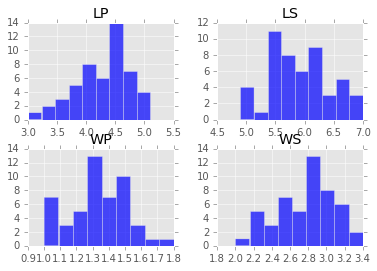

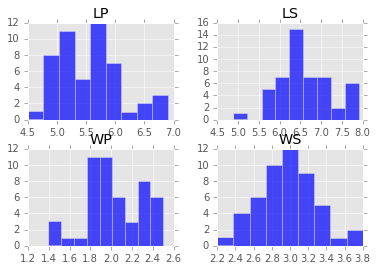

In [45]:
for tipo in pd.Series.unique(iris['CLASS']):
    print tipo
    #print iris[(iris['CLASS'] == tipo)].head()
    iris[(iris['CLASS'] == tipo)].hist(color='b', alpha=0.7, bins=k)
    
    

## 7. Representamos los histogramas reuniendo las distintas clases  
Representaremos para cada parámetro una gráfica que reunirá los histogramas de los tres tipos de lirios.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE38748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0827F0>]], dtype=object)

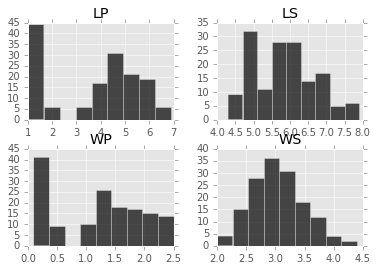

In [47]:
#iris.loc[:,'LS':'WP'].head()
#Todos los tipos de lirios
iris.loc[:,'LS':'WP'].hist(color='k', alpha=0.7, bins=k)

## 8. Representamos los diagramas de dispersión del conjunto de datos  
Representaremos una matriz de cuatro por cuatro diagramas de dispersión, para cada dos parámetros distintos. La diagonal principal está exenta del correspondiente diagrama de dispersión.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A27E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001162B4A8>]], dtype=object)

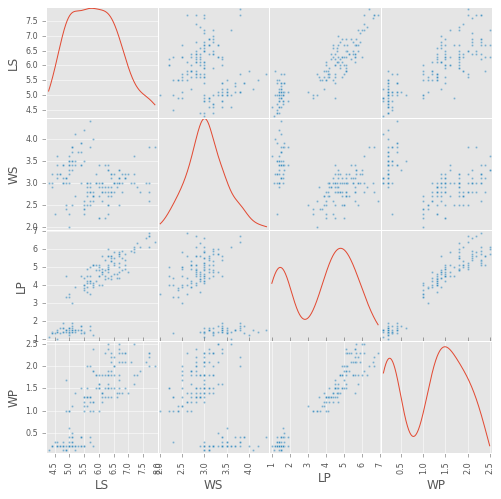

In [51]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris.loc[:,'LS':'WP'],alpha=0.6, figsize=(8, 8), diagonal='kde')

In [54]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            #y = df[factor == group].icol(rc).values icol deprecated
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

{'Iris-setosa': '#377eb8',
 'Iris-versicolor': '#4eae4b',
 'Iris-virginica': '#e41a1c'}

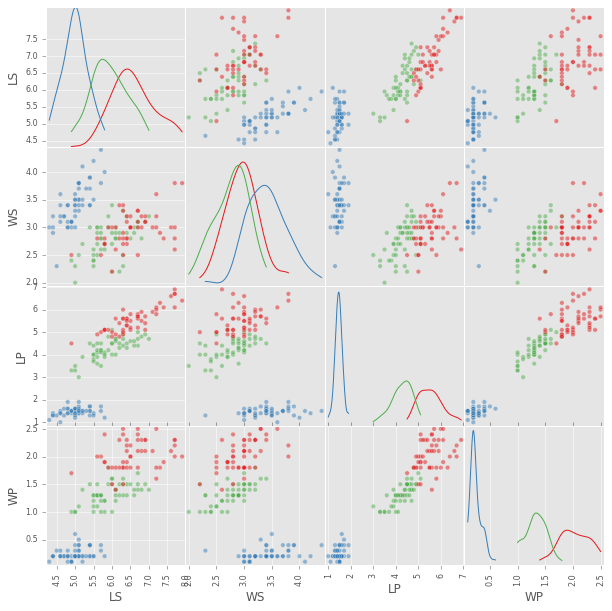

In [55]:
axarr, color_map = factor_scatter_matrix(iris,'CLASS')
color_map